# Дистанция между строками

Белок [kisspeptin](http://www.uniprot.org/uniprot/Q15726) (metastin), кодируемый геном [Kiss1/KISS1](http://www.genecards.org/cgi-bin/carddisp.pl?gene=KISS1), рассматривается как главный регулятор  полового созревания посредством регуляции гонадолиберина (GnRH). 
У человека этот белок при соединении с рецептором GPR54 на поверхности клеточной мембраны блокирует деление и миграцию клеток, т.е. препятствует метастазам при некоторых опухолях. 

В формате FASTA:
```
>sp|Q15726|KISS1_HUMAN Metastasis-suppressor KiSS-1 OS=Homo sapiens GN=KISS1 PE=1 SV=4
MNSLVSWQLLLFLCATHFGEPLEKVASVGNSRPTGQQLESLGLLAPGEQSLPCTERKPAA
TARLSRRGTSLSPPPESSGSPQQPGLSAPHSRQIPAPQGAVLVQREKDLPNYNWNSFGLR
FGKREAAPGNHGRSAGRG
```


:::{figure-md} kiss_3d
![](i/kiss_structure_space.png)

Пространственная структура кисспептина KISS1 [3D модель](https://swissmodel.expasy.org/repository/uniprot/Q15726).
:::


Также обнаружен второй вариант кисспептина Kiss2 с другой кодирующей последовательностью, но с похожей ключевой последовательностью аминокислот.

В статье {cite}`kitahashi2009` сравниваются последовательности аминокислот в кисспептинах разных позвоночных.

:::{figure-md} kiss_tree
![](i/m_zee0020945640002.jpg)

А. Выравнивание аминокислотных последовательностей из последовательности ядра (kisspeptin-10) Kiss1 и Kiss2. Консервативные аминокислотные остатки заштрихованы.
B. Филогенетический анализ последовательностей кДНК Kiss1 и Kiss2. Дерево было построено с использованием метода определения ближайших соседей.
[&copy;](https://academic.oup.com/endo/article-lookup/doi/10.1210/en.2008-0940)
:::



In [4]:
%pylab inline
np.set_printoptions(precision=5, suppress=True)

import difflib

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Пептидные последовательности составим в виде словарика "метка":"строка".

In [1]:
D={
    'homo': 'YNWNSFGLRF',
    'mus': 'YNWNSFGLRY',
    'platypus':'YNWNSFGLRY',
    'xenopus': 'YNVNSFGLRF',
    'medaka1': 'YNLNSFGLRY',
    'zf1': 'YNLNSFGLRY',
    'medaka2': 'FNYNPFGLRF',
    'zf2': 'FNYNPFGLRF',
    'fugu': 'FNLNPFGLRF',
    'xenopus2': 'FNFNPFGLRF',
    'platypus2': 'FNFNPFGLRF',
  }

## "Расстояние" между двумя строками 
    
Многие знают игру, как из МУХА сделать СЛОН. За один шаг разрешается менять только одну букву. Эта игра демонстрирует подход для измерения различий между любыми последовательностями символов.
Расстояние между словами измеряется количеством операций редактирования, которые нужны, чтобы из одного слова получить другое. При этом разные варианты таких метрик могут считать прибавление или удаление нескольких символов за одну операцию, или игнорировать пробелы, или не учитывать регистр букв и т.п. Более продвинутые системы распознавания слов учитывают падежные окончания, контекст использования, синонимы и пр. Такие системы используются для исправления запросов в поисковых системах (напр. Яндекс).

In [2]:
(D['homo'],D['mus'])

('YNWNSFGLRF', 'YNWNSFGLRY')

Сравнение строк производится по количеству операций. 

In [5]:
o=difflib.SequenceMatcher(a=D['homo'], b=D['mus'])
o.ratio()

0.9

Определим функцию, которая будет сравнивать два слова.

In [6]:
def strcompare(a,b):
    sm=difflib.SequenceMatcher(None, a, b)
    
    #m=sm.find_longest_match(0,11,0,11)
    #print('Наиболее длинная последовательность в словах {} и {}:'.format(a,b))
    
    for block in sm.get_matching_blocks():
        if block[2]:
            print("совпадение из {2} символов в позициях a[{0}] и b[{1}]".format(*block))
    print()
    print('Чтобы получить из {} => {}:'.format(a,b))
    for opcode in sm.get_opcodes():
        print("    {:7s} a[{}:{}] b[{}:{}]".format(*opcode))

    p=sm.ratio()
    print('Сходство {:.1f}%'.format(p*100))
    
    return p

In [7]:
s1='"ТЕРМИНАТОР"'
s2='Терминатор-2'
strcompare(s1,s2)

совпадение из 1 символов в позициях a[1] и b[0]

Чтобы получить из "ТЕРМИНАТОР" => Терминатор-2:
    delete  a[0:1] b[0:0]
    equal   a[1:2] b[0:1]
    replace a[2:12] b[1:12]
Сходство 8.3%


0.08333333333333333

Для человека эти строки практически одинаковы по смыслу. Но для компьютера всего лишь один общий символ - большое Т.

In [8]:
strcompare(s1.lower(), s2.lower())

совпадение из 10 символов в позициях a[1] и b[0]

Чтобы получить из "терминатор" => терминатор-2:
    delete  a[0:1] b[0:0]
    equal   a[1:11] b[0:10]
    replace a[11:12] b[10:12]
Сходство 83.3%


0.8333333333333334

Если мы приведем эти строки к единому регистру, то сходство обнаруживается.
Операции унификации важны и при сравнении биологических последовательностей. Например, при поиске комплементарных цепей РНК к известному коду ДНК нужно перекодировать все буквы в соответствии с парными комплексами  A-T и G-C.

In [9]:
strcompare(D['homo'], D['mus'])

совпадение из 9 символов в позициях a[0] и b[0]

Чтобы получить из YNWNSFGLRF => YNWNSFGLRY:
    equal   a[0:9] b[0:9]
    replace a[9:10] b[9:10]
Сходство 90.0%


0.9

Сходные явления при анализе текста и в биологии:
- Операция редактирования ~ мутация
- Расстояние между строками ~ возраст общего предка
- Приведение к одному регистру ~ трансляция ДНК в РНК
- Не учитывать окончания (стемминг) ~ вырожденность генетического кода
- Контекст использования ~ гидрофильный/гидрофобный конец, отрицательно/положительно заряженный

## Чем ближе, тем меньше дистанция

Переведем данные о пептидах в табличный вид.

In [11]:
D = pd.DataFrame(list(map(list,D.values())), index=D.keys())
D

,0,1,2,3,4,5,6,7,8,9
homo,Y,N,W,N,S,F,G,L,R,F
mus,Y,N,W,N,S,F,G,L,R,Y
platypus,Y,N,W,N,S,F,G,L,R,Y
xenopus,Y,N,V,N,S,F,G,L,R,F
medaka1,Y,N,L,N,S,F,G,L,R,Y
zf1,Y,N,L,N,S,F,G,L,R,Y
medaka2,F,N,Y,N,P,F,G,L,R,F
zf2,F,N,Y,N,P,F,G,L,R,F
fugu,F,N,L,N,P,F,G,L,R,F
xenopus2,F,N,F,N,P,F,G,L,R,F


Разные метрики дистанции работают с числами. Поэтому переведем буквы в числа. Поскольку величина этих чисел значения не имеет, пусть это будут коды этих букв в стандартной кодовой странице символов.

In [12]:
D=D.applymap(ord)
D

,0,1,2,3,4,5,6,7,8,9
homo,89,78,87,78,83,70,71,76,82,70
mus,89,78,87,78,83,70,71,76,82,89
platypus,89,78,87,78,83,70,71,76,82,89
xenopus,89,78,86,78,83,70,71,76,82,70
medaka1,89,78,76,78,83,70,71,76,82,89
zf1,89,78,76,78,83,70,71,76,82,89
medaka2,70,78,89,78,80,70,71,76,82,70
zf2,70,78,89,78,80,70,71,76,82,70
fugu,70,78,76,78,80,70,71,76,82,70
xenopus2,70,78,70,78,80,70,71,76,82,70


Посчитаем дистанцию Хэмминга, которая отражает степень совпадения отдельных символов, попарно между всеми последовательностями.

In [13]:
R = pd.DataFrame(squareform(pdist(D, 'hamming')), index=D.index, columns=D.index)
#R

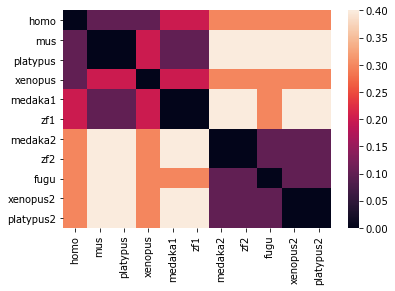

In [14]:
sns.heatmap(R);

Видно, что близкие расстояния (темные квадраты) сосредоточены в двух частях набора данных.


Выполним аггломеративный кластеринг этих данных с использованием алгоритма минимизации дисперсии Уорда.
Другими словами, найдем метрику связи между самыми близкими образцами, затем между группами близких образцов, и так далее вплоть до единой древовидной структуры сходства и различий.

In [16]:
Z = linkage(D, method='ward')
Z

array([[ 1.     ,  2.     ,  0.     ,  2.     ],
       [ 4.     ,  5.     ,  0.     ,  2.     ],
       [ 6.     ,  7.     ,  0.     ,  2.     ],
       [ 9.     , 10.     ,  0.     ,  2.     ],
       [ 0.     ,  3.     ,  1.     ,  2.     ],
       [ 8.     , 14.     ,  6.9282 ,  3.     ],
       [11.     , 12.     , 15.55635,  4.     ],
       [13.     , 16.     , 26.33629,  5.     ],
       [15.     , 17.     , 32.08323,  6.     ],
       [18.     , 19.     , 54.74796, 11.     ]])

Метрики связи визуализируются в виде дерева (дендрограммы).

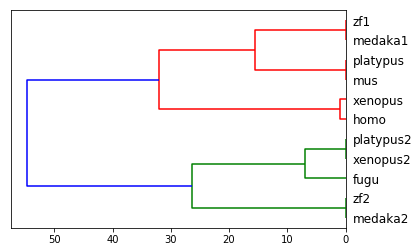

In [49]:
dendrogram(Z, orientation='left', labels=D.index);

В базовый рисунок можно добавить необходимые элементы и дополнительное оформление.

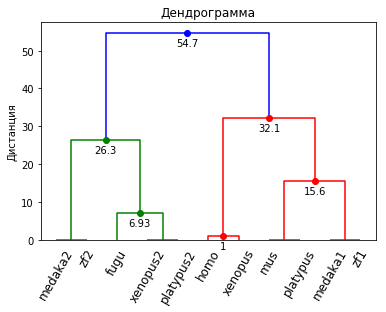

In [62]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма')
        plt.xticks(rotation=60)
#         plt.xlabel('Образец')
        plt.ylabel('Дистанция')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

ddata = fancy_dendrogram(Z, labels=D.index);

> С кем человек попал в одну ветку на основании последовательности белка-регулятора полового созревания?

Последовательность кисспептина очень короткая и у одного вида организмов встречается несколько вариантов этого пептида.
Тем не менее этой информации достаточно, чтобы строить структурные модели соотношения между образцами.

Авторы использовали другой метод кластеринга - метод ближайших соседей.
Пептид у мыши отличается от человеческого всего на одну аминокислоту, а у шпорцевой лягушки - на две.
Но если мы посмотрим только на первую и последнюю (сами авторы выделяют два больших семейства Y-Y и F-F пептидов), то значимое сочетание Y-F будет только у человека и лягушки.

Дерево можно разрезать на уровне крупных ветвей, чтобы получить индексы кластеров (групп, ветвей).

In [17]:
max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 4, 4, 3, 4, 4, 1, 1, 2, 2, 2], dtype=int32)

In [18]:
pd.Series(clusters, index=D.index, name='cluster')

homo         3
mus          4
platypus     4
xenopus      3
medaka1      4
zf1          4
medaka2      1
zf2          1
fugu         2
xenopus2     2
platypus2    2
Name: cluster, dtype: int32

> Какую надо задать максимальную дистанцию (переменная `max_d`), чтобы выделить только два кластера?

::: {seealso}

В 1990 году предложен новый подход к сравнению последовательностей 
basic local alignment search tool (BLAST),
в котором оптимизируется мера локального сходства и рассчитывается показатель максимально спаренного сегмента (the maximal segment pair (MSP) score). Этот инструмент используется генетиками при выстраивании огромных геномных последовательностей.

[Biopython](http://biopython.org/DIST/docs/tutorial/Tutorial.html) - специальная библиотека для работы с объектами молекулярной биологии.

[Образец анализа с использованием scikit-bio](http://nbviewer.jupyter.org/github/biocore/scikit-bio-cookbook/blob/master/Alignments%20and%20phylogenetic%20reconstruction.ipynb)

:::